# Proyecto 04 - Gastón Benoit

Resumen del proyecto:
Profundiza y ajusta la resolución de tus proyectos. Agrega una fuente de datos, prueba un modelo nuevo o responde una pregunta nueva. Elabora un informe final que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.

La realización y entrega del Proyecto es individual.


## Novedades respecto a Proyecto 02:

1) Nueva pregunta problema a desarrollar

2) Re-exploración de datos para el dataset acorde a la pregunta problema.

3) Readaptación del dataset.

3) Preprocesamiento. Mejora en las tareas de preprocesamiento. Realizando reescalado de datos para todas las variables numéricas y one-hot encoding para dos variables categóricas que a-priori parecían tener una relación importante con el precio ("barrio") y ("tipo de propiedad")

4) En los modelos de Machine Learning corrobaro que los conjuntos de train y test tengan una distribución similar.

### Pregunta problema a desarrollar en el proyecto. 

¿Existe alguna relación entre el tiempo de publicación de la propiedad con las características de la misma? 
Durante el proyecto 01 y 02 la variable tiempo no fue trabajada. Se buscará mediante el presente análisis utilizar los datos de tiempo del dataset y ver si poseen alguna relación respecto a las caracterisiticas de la propiedad y tratar de predecir cuanto tiempo puede tardar en venderse esa propiedad. 

In [1]:
#Importamos las librerias

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
properaty = pd.read_csv('C:/Users/Gasto/Documents/Data Science/Proyecto_02/DS_Proyecto_01_Datos_Properati.csv')

In [3]:
properaty.shape

(146660, 19)

In [4]:
properaty.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [5]:
properaty['operation_type'].unique()

array(['Venta'], dtype=object)

Confirmo aquí que todas las operaciones del dataset son del tipo Venta, con lo cual analizaremos el tiempo de vente de la propiedad.

In [6]:
propdf = properaty.drop(columns=['created_on','currency','title','description','operation_type'], axis=1)

In [7]:
propdf.head()

,start_date,end_date,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,2019-10-17,2020-03-11,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


Me quedo con las columnas que voy a trabajar.

In [8]:
propdf = propdf.rename(columns={'l2':'Localidad','l3':'Barrio','l1':'País'})

In [9]:
propdf.head()

,start_date,end_date,lat,lon,País,Localidad,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,2019-10-17,2020-03-11,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


## TRATADO DE NULOS Y FALTANTES 

In [10]:
propdf.isnull().sum()

start_date             0
end_date               0
lat                 9925
lon                 9959
País                   0
Localidad              0
Barrio                 0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

Observo que las fechas de 'Star_date' y 'End_date' no poseen nulos ni faltantes por lo que solo trabajaremos con LAT, LON, Baños y Superficies. Destaco, además, que para el presente proyecto se entiende que la fecha de "End_date" es la fecha en la que se estipula la baja del data set por la venta la unidad. Por lo tanto, "end_Date" es igual a Fecha_Venta

In [11]:
print('PORCENTAJE DE NULOS')
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

PORCENTAJE DE NULOS
start_date 0.00%
end_date 0.00%
lat 6.77%
lon 6.79%
País 0.00%
Localidad 0.00%
Barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 14.00%
surface_covered 14.74%
price 0.00%
property_type 0.00%


Sobre el total de faltantes de, los más representativos me parecen los de superficie. Los de LAT, LON y Baños me parecen más bajos. Debo tener cuidado de no completar los faltantes de baños en unidades que no lleven, como pueden ser los lotes o depósitos. 

In [12]:
propdf['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [13]:
propdf.surface_total.fillna(propdf.surface_covered, inplace=True)
propdf.surface_covered.fillna(propdf.surface_total, inplace=True)

In [14]:
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

start_date 0.00%
end_date 0.00%
lat 6.77%
lon 6.79%
País 0.00%
Localidad 0.00%
Barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 13.65%
surface_covered 13.65%
price 0.00%
property_type 0.00%


In [15]:
mean_surface = propdf[["surface_covered", "property_type"]].groupby("property_type").agg(pd.Series.median)
mean_surface.to_dict()

{'surface_covered': {'Casa': 160.0,
  'Casa de campo': 161.5,
  'Cochera': 13.5,
  'Departamento': 60.0,
  'Depósito': 412.5,
  'Local comercial': 90.0,
  'Lote': 502.0,
  'Oficina': 57.0,
  'Otro': 406.0,
  'PH': 80.0}}

In [16]:
propdf.reset_index(inplace=True)

In [17]:
propdf = propdf.set_index("property_type")
propdf.surface_covered.fillna(mean_surface.to_dict()["surface_covered"], inplace=True)
propdf.reset_index(inplace=True)
propdf.head()

,property_type,index,start_date,end_date,lat,lon,País,Localidad,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,2,2019-10-17,2019-11-01,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,3,2019-10-17,2019-12-23,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,PH,4,2019-10-17,2020-03-11,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0


In [18]:
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
index 0.00%
start_date 0.00%
end_date 0.00%
lat 6.77%
lon 6.79%
País 0.00%
Localidad 0.00%
Barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 13.65%
surface_covered 0.00%
price 0.00%


Logro reducir los faltanes de surface_covered a 0. Siendo que no utilizaré Surface_Total, me deshago de la columna. 

In [19]:
propdf = propdf.drop(columns=['surface_total'])

In [20]:
propdf = propdf.drop(columns=['bedrooms'])

In [21]:
propdf.head(2)

,property_type,index,start_date,end_date,lat,lon,País,Localidad,Barrio,rooms,bathrooms,surface_covered,price
0,Departamento,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,2.0,140.0,153000.0
1,PH,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,2.0,58.0,159000.0


In [22]:
propdf['Barrio'].unique

<bound method Series.unique of 0         San Cristobal
1                 Boedo
2               Palermo
3               Palermo
4              La Plata
              ...      
146655      Berazategui
146656            Pilar
146657            Pilar
146658            Pilar
146659            Pilar
Name: Barrio, Length: 146660, dtype: object>

In [23]:
lon_barrio = propdf[['lon', 'Barrio']].groupby('Barrio').agg(pd.Series.mean)
lat_barrio = propdf[['lat', 'Barrio']].groupby('Barrio').agg(pd.Series.mean)
propdf = propdf.set_index('Barrio')
propdf.lon.fillna(lon_barrio.to_dict()['lon'], inplace=True)
propdf.lat.fillna(lat_barrio.to_dict()['lat'], inplace=True)
propdf = propdf.reset_index()
propdf.head(2)

,Barrio,property_type,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price
0,San Cristobal,Departamento,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0
1,Boedo,PH,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0


In [24]:
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

Barrio 0.00%
property_type 0.00%
index 0.00%
start_date 0.00%
end_date 0.00%
lat 0.00%
lon 0.00%
País 0.00%
Localidad 0.00%
rooms 0.00%
bathrooms 4.06%
surface_covered 0.00%
price 0.00%


In [25]:
mean_bathrooms = propdf[["bathrooms", "property_type"]].groupby("property_type").agg(pd.Series.median)
mean_bathrooms.to_dict()

{'bathrooms': {'Casa': 2.0,
  'Casa de campo': 2.0,
  'Cochera': 1.0,
  'Departamento': 1.0,
  'Depósito': 1.0,
  'Local comercial': 1.0,
  'Lote': 1.0,
  'Oficina': 1.0,
  'Otro': 2.0,
  'PH': 1.0}}

De esta forma me aseguro de llenar valores faltantes de baños por tipo de propiedad y reduzco el error de llenar con más baños propiedades que solo llevan 1. 

In [26]:
propdf = propdf.set_index("property_type")
propdf.bathrooms.fillna(mean_bathrooms.to_dict()["bathrooms"], inplace=True)
propdf.reset_index(inplace=True)
propdf.head()

,property_type,Barrio,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price
0,Departamento,San Cristobal,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0
1,PH,Boedo,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0
2,PH,Palermo,2,2019-10-17,2019-11-01,-34.593569,-58.427474,Argentina,Capital Federal,2.0,1.0,45.0,125000.0
3,PH,Palermo,3,2019-10-17,2019-12-23,-34.581294,-58.436754,Argentina,Capital Federal,2.0,1.0,50.0,295000.0
4,PH,La Plata,4,2019-10-17,2020-03-11,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,2.0,1.0,35.0,40000.0


In [27]:
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
Barrio 0.00%
index 0.00%
start_date 0.00%
end_date 0.00%
lat 0.00%
lon 0.00%
País 0.00%
Localidad 0.00%
rooms 0.00%
bathrooms 0.00%
surface_covered 0.00%
price 0.00%


# Tratamiento de Outliers 

Tanto en el Proyecto 01 como el 02 fueron focalizados en el análisis de propiedades de Capital Federal por lo que, para mantener una coherencia en el análisis y que los resultados sean comparables entre proyectos, el presente análisis también se basará en Capital Federal. 

In [28]:
propdf2 = propdf[(propdf['Localidad']=='Capital Federal')]

propdf2.shape

(92539, 13)

In [29]:
propdf2.head(2)

,property_type,Barrio,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price
0,Departamento,San Cristobal,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0
1,PH,Boedo,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0


In [30]:
#Prueba por rango intercuartilico
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out_price = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out_price

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [31]:
get_iqr_values(propdf2, 'price')
get_iqr_text(propdf2, 'price')

'median=175000.00, q1=120000.00, q3=279000.00, iqr=159000.00, minimum=-118500.00, maximum=517500.00'

In [32]:
df_out = remove_outliers(propdf2, 'price')

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


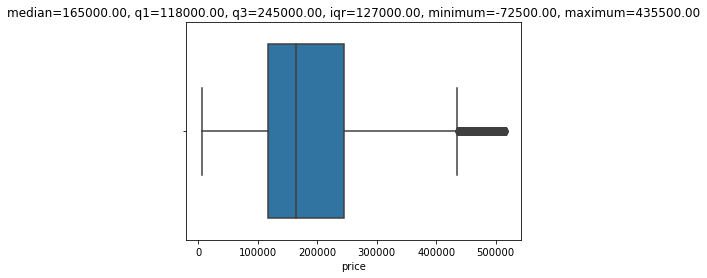

In [33]:
box_and_whisker(df_out, 'price')

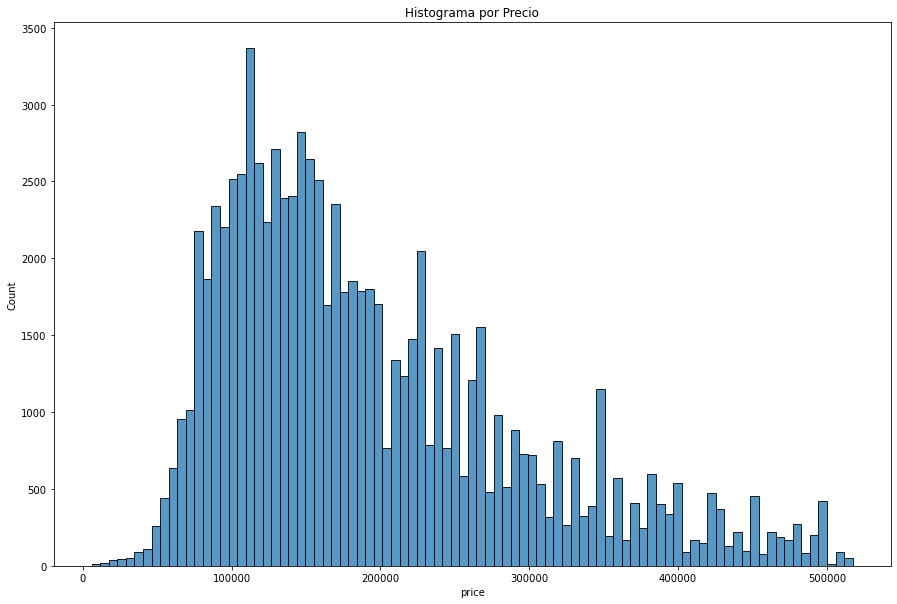

In [34]:
plt.figure(figsize=(15,10))
sns.histplot(df_out['price'])
plt.title('Histograma por Precio')
plt.show()

Obtengo un filtrado del data set más razonable que no me elimina tantas filas. Todavía no formalizo el dataset final. Continuo trabajando los outliers del resto de los features. 

In [35]:
#Filtrado para superficie cubierta. 
get_iqr_values(propdf2, 'surface_covered')
get_iqr_text(propdf2, 'surface_covered')

'median=60.00, q1=46.00, q3=92.00, iqr=46.00, minimum=-23.00, maximum=161.00'

In [36]:
df_out = remove_outliers(propdf2, 'surface_covered')

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


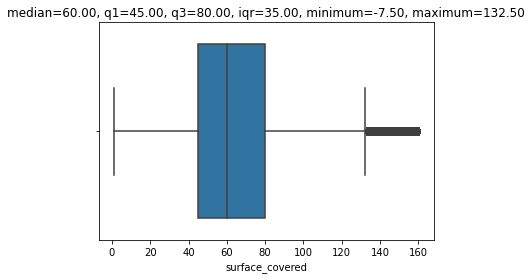

In [37]:
box_and_whisker(df_out, 'surface_covered')

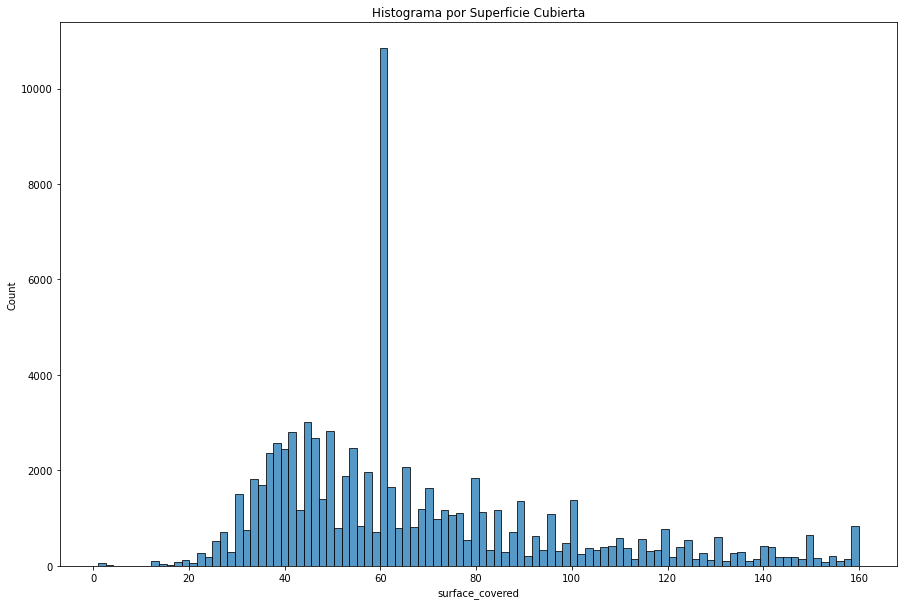

In [38]:
plt.figure(figsize=(15,10))
sns.histplot(df_out['surface_covered'])
plt.title('Histograma por Superficie Cubierta')
plt.show()

In [39]:
#Filtrado por baños
get_iqr_values(propdf2, 'bathrooms')
get_iqr_text(propdf2, 'bathrooms')

'median=1.00, q1=1.00, q3=2.00, iqr=1.00, minimum=-0.50, maximum=3.50'

In [40]:
df_out = remove_outliers(propdf2, 'bathrooms')

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


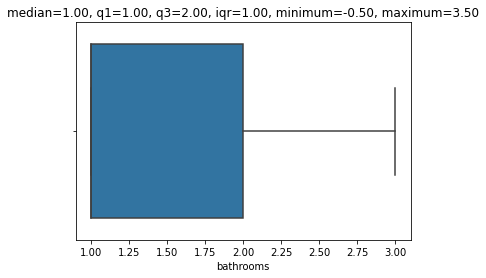

In [41]:
box_and_whisker(df_out, 'bathrooms')

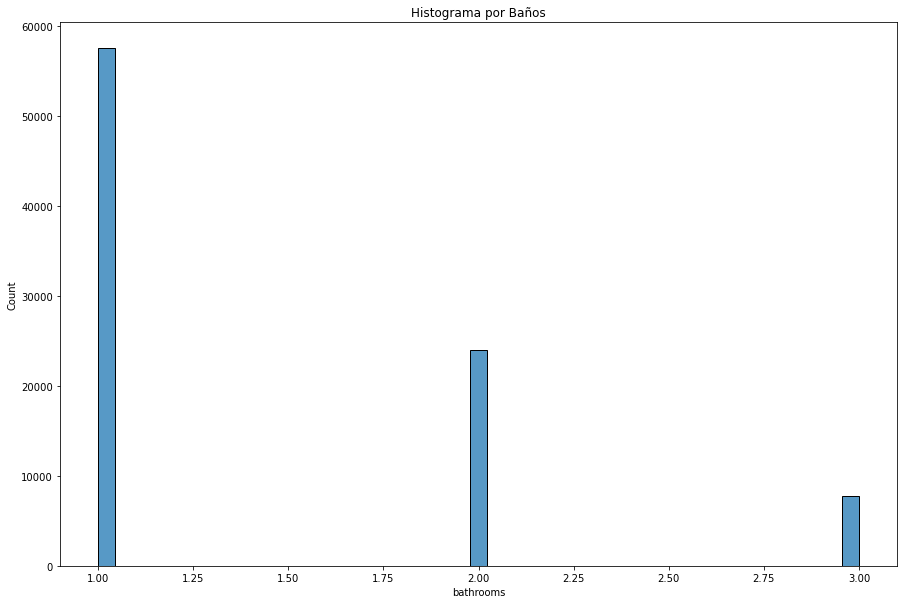

In [42]:
plt.figure(figsize=(15,10))
sns.histplot(df_out['bathrooms'])
plt.title('Histograma por Baños')
plt.show()

In [43]:
#Filtrado para habitaciones. 
get_iqr_values(propdf2, 'rooms')
get_iqr_text(propdf2, 'rooms')

'median=3.00, q1=2.00, q3=4.00, iqr=2.00, minimum=-1.00, maximum=7.00'

In [44]:
df_out = remove_outliers(propdf2, 'rooms')

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


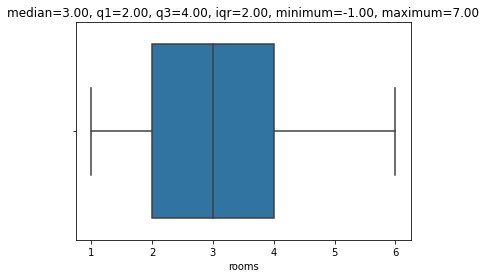

In [45]:
box_and_whisker(df_out, 'rooms')

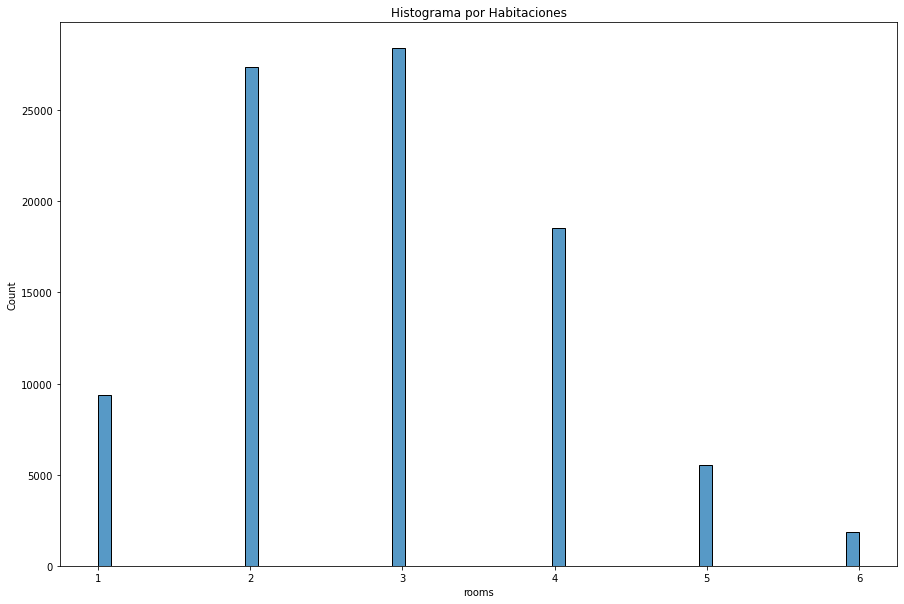

In [46]:
plt.figure(figsize=(15,10))
sns.histplot(df_out['rooms'])
plt.title('Histograma por Habitaciones')
plt.show()

## Filtrado definitivo

Habiendo trabajado los outliers para las variables categóricas, realizó el filtro sobre el dataset

In [47]:
superficie = propdf2[(propdf2.surface_covered >= 23) & (propdf['surface_covered'] <= 161)]

C:\Users\Gasto\AppData\Local\Temp/ipykernel_2040/626773156.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  superficie = propdf2[(propdf2.surface_covered >= 23) & (propdf['surface_covered'] <= 161)]


In [48]:
porbaños = superficie[(superficie.bathrooms >= 0) & (superficie['bathrooms'] <= 4)]

In [49]:
porhab = porbaños[(porbaños.rooms >= 1) & (porbaños['rooms'] <= 7)]

In [50]:
porhab.head()

,property_type,Barrio,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price
0,Departamento,San Cristobal,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0
1,PH,Boedo,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0
2,PH,Palermo,2,2019-10-17,2019-11-01,-34.593569,-58.427474,Argentina,Capital Federal,2.0,1.0,45.0,125000.0
3,PH,Palermo,3,2019-10-17,2019-12-23,-34.581294,-58.436754,Argentina,Capital Federal,2.0,1.0,50.0,295000.0
5,PH,Villa Crespo,5,2019-10-17,2019-11-01,-34.593779,-58.441239,Argentina,Capital Federal,2.0,1.0,56.0,150000.0


In [51]:
propfinal = porhab[(porhab.price >= 118500) & (porhab['price'] <= 517500)]

In [52]:
propfinal.shape

(60357, 13)

In [53]:
propfinal.describe()

,index,lat,lon,rooms,bathrooms,surface_covered,price
count,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000
mean,71341.828388,-34.596244,-58.437481,3.016419,1.497937,72.897013,220241.802972
std,42079.580968,0.023108,0.034383,0.985234,0.672384,28.644515,87883.855978
min,0.000000,-34.696419,-58.530468,1.000000,1.000000,23.000000,118500.000000
25%,34330.000000,-34.610000,-58.459161,2.000000,1.000000,53.000000,150000.000000
50%,70797.000000,-34.596810,-58.434258,3.000000,1.000000,64.000000,195000.000000
75%,107442.000000,-34.581765,-58.414350,4.000000,2.000000,87.000000,265000.000000
max,146557.000000,-34.535818,-58.353930,7.000000,4.000000,161.000000,517266.000000


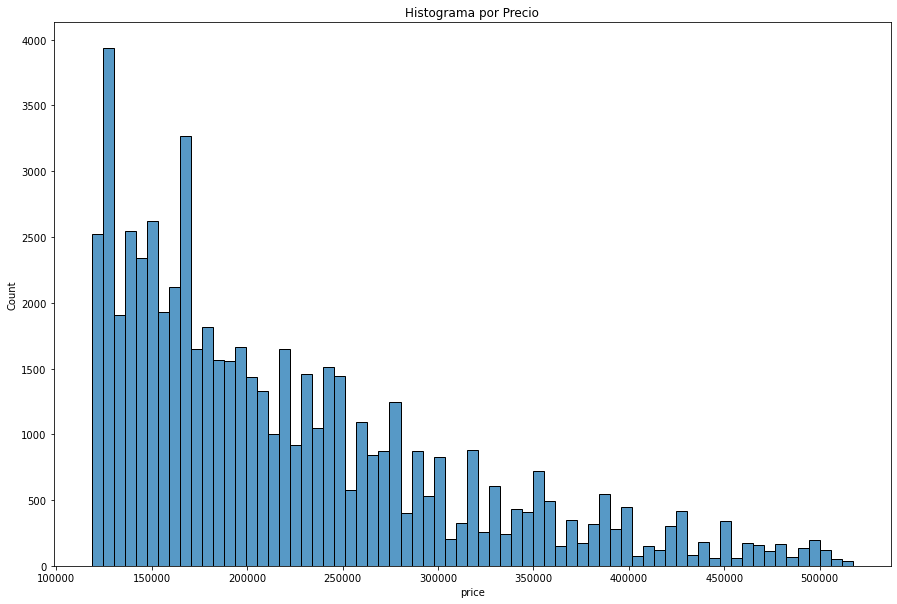

In [54]:
plt.figure(figsize=(15,10))
sns.histplot(propfinal['price'])
plt.title('Histograma por Precio')
plt.show()

Habiendo eliminado outliers obtengo una distribución más aceptable para los precios de las propiedades

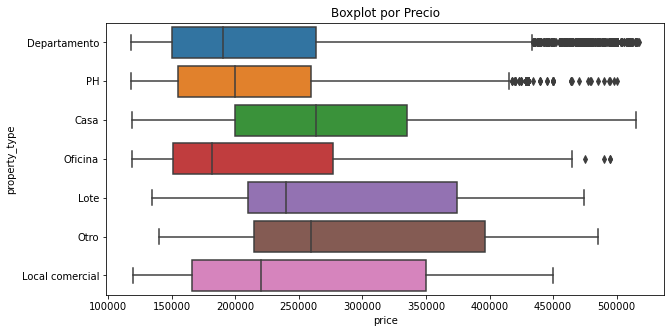

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price', y='property_type',data=propfinal)
plt.title('Boxplot por Precio')
plt.show()

Lo mismo sucede para los tipos de propiedades

Text(0.5, 1.0, 'Q por tipo de propiedad')

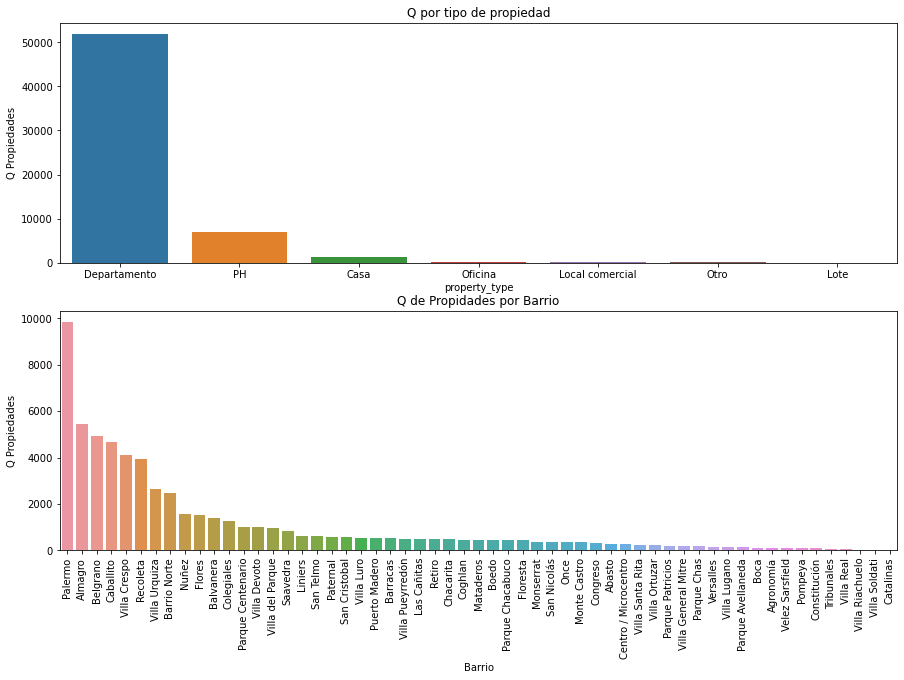

In [56]:
#Orden por Barrio
barr_prop = propfinal['Barrio'].value_counts()
orden_barr = barr_prop.index

#Orden por tipo de propiedad
tip_prop = propfinal['property_type'].value_counts()
orden_prop = tip_prop.index

#Tamaño del gráfico
plt.figure(figsize = (15,15))

#plt.subplot(3,1,1)
#sns.countplot(data = propfinal, x = 'Localidad', order = orden_loc)
#plt.xticks(rotation=0)
#plt.xlabel('Localidad')
#plt.ylabel('Q Propiedades')
#plt.title('Q de Propidades por Localidad')

plt.subplot(3,1,3)
sns.countplot(data = propfinal, x = 'Barrio', order = orden_barr)
plt.xticks(rotation=90)
plt.xlabel('Barrio')
plt.ylabel('Q Propiedades')
plt.title('Q de Propidades por Barrio')

plt.subplot(3,1,2)
sns.countplot(data = propfinal, x = 'property_type', order = orden_prop)
plt.xticks(rotation=0)
plt.xlabel('property_type')
plt.ylabel('Q Propiedades')
plt.title('Q por tipo de propiedad')

Si bien la muestra parace más sesgada para casa otras propiedades que no sean departamentos, la cantidad de departamentos publicados para capital federeal sigue siendo muy superior por sobre el resto por lo que asumo que los valores filtrados son aceptables. Defino que es mi dataset definitivo.

# Ampliación del dataset 

Habiendo preparado el dataset completando nulos y faltantes, más la eliminación de outliers, continuo por ampliar el dataset con los datos de interes para la pregunta problema.

A diferencia del trabajo anterior, esta vez he decidido trabajar con las fechas de publicación por lo que defino:

Star_date = Fecha de alta de la publicación.

End_date_ Fecha de baja de la publicación. Se entiende como baja al cumplimiento de la operación. Siendo que el dataset es enteramente de ventas, entonces suponemos que la venta fue efectuada.

In [57]:
def f(x, y):
    return(y - x).days

No habiendo nulos ni faltantes para las fechas, creo la función que calcule la cantidad de días de cada publicación y luego la agrego en un columna para cada publicación:

In [58]:
propfinal["start_date"] = propfinal["start_date"].apply(lambda x: (datetime.date(int(str(x)[0:4]), int(str(x)[5:7]), int(str(x)[8:10]))))
propfinal["end_date"] = propfinal["end_date"].apply(lambda x: (datetime.date(int(str(x)[0:4]), int(str(x)[5:7]), int(str(x)[8:10]))))
propfinal['days'] = propfinal.apply(lambda x: f(x['start_date'], x['end_date']), axis=1)

C:\Users\Gasto\AppData\Local\Temp/ipykernel_2040/234410430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propfinal["start_date"] = propfinal["start_date"].apply(lambda x: (datetime.date(int(str(x)[0:4]), int(str(x)[5:7]), int(str(x)[8:10]))))
C:\Users\Gasto\AppData\Local\Temp/ipykernel_2040/234410430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propfinal["end_date"] = propfinal["end_date"].apply(lambda x: (datetime.date(int(str(x)[0:4]), int(str(x)[5:7]), int(str(x)[8:10]))))
C:\Users\Gasto\App

In [59]:
propfinal.head(2)

,property_type,Barrio,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price,days
0,Departamento,San Cristobal,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0,67
1,PH,Boedo,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0,35


Creación de columna con éxito. Ahora evalúo la distribución del dato creado:

In [60]:
propfinal.describe()

,index,lat,lon,rooms,bathrooms,surface_covered,price,days
count,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,6.035700e+04
mean,71341.828388,-34.596244,-58.437481,3.016419,1.497937,72.897013,220241.802972,3.346950e+05
std,42079.580968,0.023108,0.034383,0.985234,0.672384,28.644515,87883.855978,9.291975e+05
min,0.000000,-34.696419,-58.530468,1.000000,1.000000,23.000000,118500.000000,0.000000e+00
25%,34330.000000,-34.610000,-58.459161,2.000000,1.000000,53.000000,150000.000000,1.300000e+01
50%,70797.000000,-34.596810,-58.434258,3.000000,1.000000,64.000000,195000.000000,2.600000e+01
75%,107442.000000,-34.581765,-58.414350,4.000000,2.000000,87.000000,265000.000000,9.800000e+01
max,146557.000000,-34.535818,-58.353930,7.000000,4.000000,161.000000,517266.000000,2.914998e+06


In [61]:
for p in propfinal['property_type'].unique():
    mode = round((propfinal[propfinal['property_type'] == p]['days'].values).mean(), 2)
    max = (propfinal[propfinal['property_type'] == p]['days'].values).max()
    min = (propfinal[propfinal['property_type'] == p]['days'].values).min()
    print("El tipo de departamento {}, la media es {}, el maximo es {} y el minimo es {}".format(p, mode, max, min))

El tipo de departamento Departamento, la media es 336727.5, el maximo es 2914998 y el minimo es 0
El tipo de departamento PH, la media es 184240.65, el maximo es 2914992 y el minimo es 0
El tipo de departamento Casa, la media es 950388.9, el maximo es 2914989 y el minimo es 0
El tipo de departamento Oficina, la media es 635297.45, el maximo es 2914992 y el minimo es 0
El tipo de departamento Lote, la media es 73.52, el maximo es 183 y el minimo es 2
El tipo de departamento Otro, la media es 624586.81, el maximo es 2914646 y el minimo es 1
El tipo de departamento Local comercial, la media es 2242027.29, el maximo es 2914682 y el minimo es 10


Observo que hay un máximo de casi 3 millones de días lo cual me indica que el dataset debe tener fechas inconsistentes grabadas en las publicaciones. Intento identificar la causa de los desvíos

In [62]:
propfinal[propfinal['days'] >= 200000]

,property_type,Barrio,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price,days
50,Departamento,Palermo,50,2019-10-17,9999-12-31,-34.583199,-58.433708,Argentina,Capital Federal,2.0,1.0,54.0,240000.0,2914710
68,Departamento,Belgrano,68,2019-10-17,9999-12-31,-34.562661,-58.465351,Argentina,Capital Federal,2.0,1.0,41.0,125600.0,2914710
74,Departamento,Belgrano,74,2019-10-17,9999-12-31,-34.562661,-58.465351,Argentina,Capital Federal,2.0,1.0,41.0,138400.0,2914710
78,Departamento,Belgrano,78,2019-10-17,9999-12-31,-34.562661,-58.465351,Argentina,Capital Federal,2.0,1.0,46.0,192500.0,2914710
83,Departamento,Recoleta,83,2019-10-17,9999-12-31,-34.587292,-58.403118,Argentina,Capital Federal,1.0,1.0,28.0,135000.0,2914710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145622,Departamento,Recoleta,145622,2020-01-20,9999-12-31,-34.592813,-58.379160,Argentina,Capital Federal,5.0,3.0,148.0,410000.0,2914615
146472,Departamento,Palermo,146472,2019-07-31,9999-12-31,-34.580357,-58.434867,Argentina,Capital Federal,2.0,1.0,48.0,196146.0,2914788
146528,Departamento,Palermo,146528,2019-07-31,9999-12-31,-34.580357,-58.434867,Argentina,Capital Federal,3.0,2.0,68.0,237677.0,2914788
146535,Departamento,Palermo,146535,2019-07-31,9999-12-31,-34.580357,-58.434867,Argentina,Capital Federal,3.0,1.0,74.0,266647.0,2914788


In [63]:
propfinal[propfinal['days'] >= 150000]

,property_type,Barrio,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price,days
50,Departamento,Palermo,50,2019-10-17,9999-12-31,-34.583199,-58.433708,Argentina,Capital Federal,2.0,1.0,54.0,240000.0,2914710
68,Departamento,Belgrano,68,2019-10-17,9999-12-31,-34.562661,-58.465351,Argentina,Capital Federal,2.0,1.0,41.0,125600.0,2914710
74,Departamento,Belgrano,74,2019-10-17,9999-12-31,-34.562661,-58.465351,Argentina,Capital Federal,2.0,1.0,41.0,138400.0,2914710
78,Departamento,Belgrano,78,2019-10-17,9999-12-31,-34.562661,-58.465351,Argentina,Capital Federal,2.0,1.0,46.0,192500.0,2914710
83,Departamento,Recoleta,83,2019-10-17,9999-12-31,-34.587292,-58.403118,Argentina,Capital Federal,1.0,1.0,28.0,135000.0,2914710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145622,Departamento,Recoleta,145622,2020-01-20,9999-12-31,-34.592813,-58.379160,Argentina,Capital Federal,5.0,3.0,148.0,410000.0,2914615
146472,Departamento,Palermo,146472,2019-07-31,9999-12-31,-34.580357,-58.434867,Argentina,Capital Federal,2.0,1.0,48.0,196146.0,2914788
146528,Departamento,Palermo,146528,2019-07-31,9999-12-31,-34.580357,-58.434867,Argentina,Capital Federal,3.0,2.0,68.0,237677.0,2914788
146535,Departamento,Palermo,146535,2019-07-31,9999-12-31,-34.580357,-58.434867,Argentina,Capital Federal,3.0,1.0,74.0,266647.0,2914788


Encuentro que hay más 6mil publicaciones que poseen una fecha incosistente de End_date, posiblemente debido a que la publicación continúa vigente al momento de la extracción del dataset. Asumo que debemos trabajar con las publicaciones que se hayan dado de alta y hayan tenido una fecha de venta, por lo que decido extraer estas publicaciones. 

In [64]:
propfinal_2 = propfinal[propfinal['days'] <= 2000000]

In [65]:
propfinal_2.shape

(53427, 14)

In [66]:
propfinal_2.describe()

,index,lat,lon,rooms,bathrooms,surface_covered,price,days
count,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000
mean,70385.906152,-34.595369,-58.436255,3.022423,1.491643,73.274225,220998.817789,45.193142
std,42432.929082,0.022320,0.033543,0.978651,0.666753,28.862630,87985.698064,53.342554
min,0.000000,-34.696419,-58.530468,1.000000,1.000000,23.000000,118500.000000,0.000000
25%,33299.500000,-34.608248,-58.456518,2.000000,1.000000,51.000000,150300.500000,12.000000
50%,69906.000000,-34.596250,-58.433189,3.000000,1.000000,66.000000,195000.000000,19.000000
75%,107364.500000,-34.581733,-58.414110,4.000000,2.000000,89.000000,265000.000000,66.000000
max,146557.000000,-34.535909,-58.353930,7.000000,4.000000,161.000000,517266.000000,427.000000


Ahora observo un promedio de días más razonable. Vuelvo a evaluar los días por tipo de propiedad.

In [67]:
for p in propfinal_2['property_type'].unique():
    mode = round((propfinal_2[propfinal_2['property_type'] == p]['days'].values).mean(), 2)
    max = (propfinal_2[propfinal_2['property_type'] == p]['days'].values).max()
    min = (propfinal_2[propfinal_2['property_type'] == p]['days'].values).min()
    print("El tipo de departamento {}, la media es {}, el maximo es {} y el minimo es {}".format(p, mode, max, min))

El tipo de departamento Departamento, la media es 44.71, el maximo es 427 y el minimo es 0
El tipo de departamento PH, la media es 44.83, el maximo es 377 y el minimo es 0
El tipo de departamento Casa, la media es 71.14, el maximo es 384 y el minimo es 0
El tipo de departamento Oficina, la media es 60.83, el maximo es 304 y el minimo es 0
El tipo de departamento Lote, la media es 73.52, el maximo es 183 y el minimo es 2
El tipo de departamento Otro, la media es 30.3, el maximo es 192 y el minimo es 1
El tipo de departamento Local comercial, la media es 31.58, el maximo es 65 y el minimo es 10


Debido a que Departamento, Casa y PH son las propiedades dominantes en el dataset, solo evaluaré la distribución de estas propiedades respecto a la variable de interes. 

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

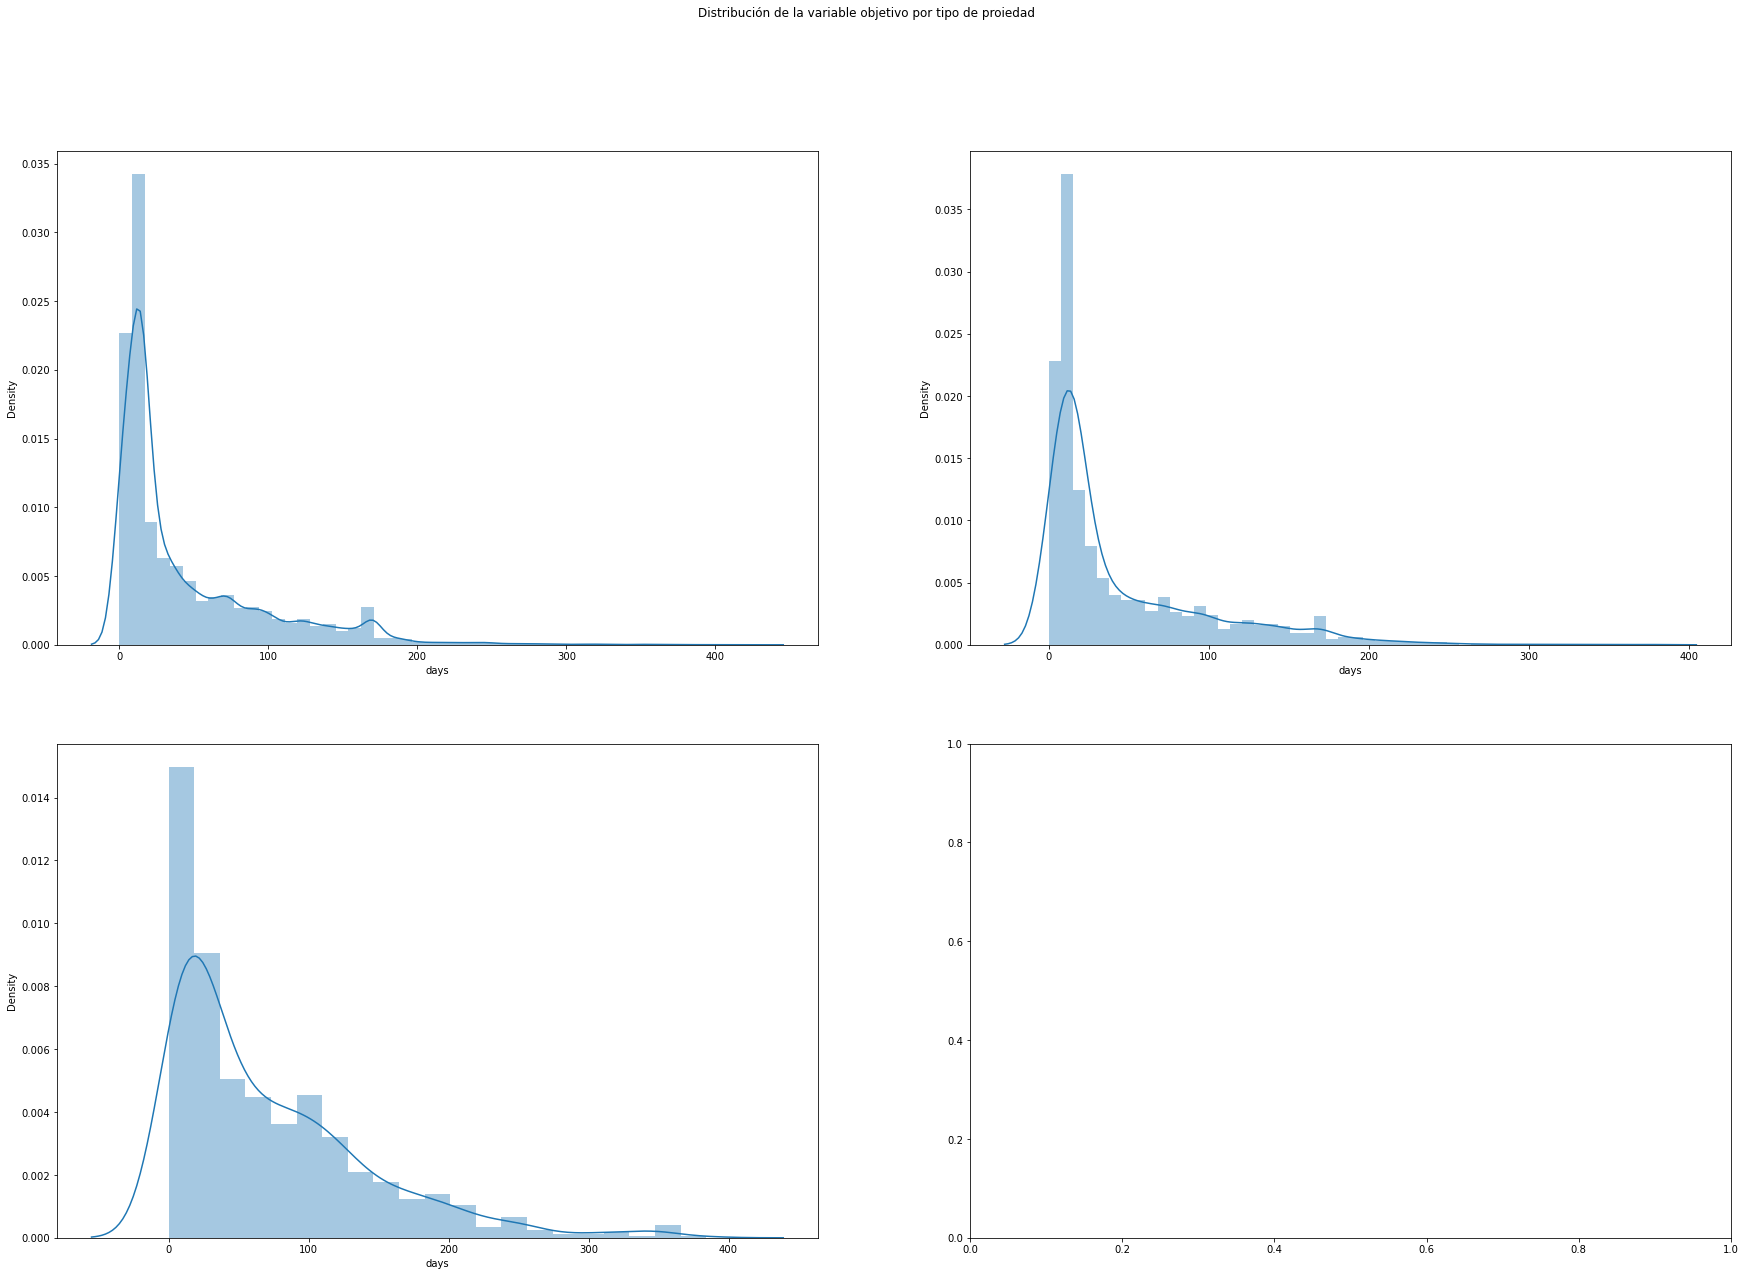

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))

fig.suptitle('Distribución de la variable objetivo por tipo de proiedad')

sns.distplot(ax=axes[0, 0], a=propfinal_2[propfinal_2['property_type'] == "Departamento"]['days'])
sns.distplot(ax=axes[0, 1], a=propfinal_2[propfinal_2['property_type'] == "PH"]['days'])
sns.distplot(ax=axes[1, 0], a=propfinal_2[propfinal_2['property_type'] == "Casa"]['days'])

plt.show()

No se observan anomalías en la distribución de los datos.

Por último, vuelvo a calcular el valor del metro cuadrado de cada propiedad, variable que fue de gran relevancia en los proyectos anteriores y, además, extraigo la variable mes para evaluar una posible estacionalidad del negocio. 

In [69]:
propfinal_2['pricem2']=propfinal_2["price"]/propfinal_2["surface_covered"]

C:\Users\Gasto\AppData\Local\Temp/ipykernel_2040/1641399654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propfinal_2['pricem2']=propfinal_2["price"]/propfinal_2["surface_covered"]


In [70]:
propfinal_2.head(2)

,property_type,Barrio,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price,days,pricem2
0,Departamento,San Cristobal,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0,67,1092.857143
1,PH,Boedo,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0,35,2741.379310


In [71]:
def month(x):
    return(x.month)

In [72]:
propfinal_2["month"] = propfinal_2.apply(lambda x: month(x['start_date']), axis=1)

C:\Users\Gasto\AppData\Local\Temp/ipykernel_2040/423238936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propfinal_2["month"] = propfinal_2.apply(lambda x: month(x['start_date']), axis=1)


In [73]:
propfinal_2.head(2)

,property_type,Barrio,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price,days,pricem2,month
0,Departamento,San Cristobal,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0,67,1092.857143,10
1,PH,Boedo,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0,35,2741.379310,10


In [74]:
propfinal_2.describe()

,index,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month
count,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000,53427.000000
mean,70385.906152,-34.595369,-58.436255,3.022423,1.491643,73.274225,220998.817789,45.193142,3153.723024,6.142756
std,42432.929082,0.022320,0.033543,0.978651,0.666753,28.862630,87985.698064,53.342554,952.598998,3.426289
min,0.000000,-34.696419,-58.530468,1.000000,1.000000,23.000000,118500.000000,0.000000,781.250000,1.000000
25%,33299.500000,-34.608248,-58.456518,2.000000,1.000000,51.000000,150300.500000,12.000000,2526.315789,3.000000
50%,69906.000000,-34.596250,-58.433189,3.000000,1.000000,66.000000,195000.000000,19.000000,3014.705882,6.000000
75%,107364.500000,-34.581733,-58.414110,4.000000,2.000000,89.000000,265000.000000,66.000000,3644.067797,9.000000
max,146557.000000,-34.535909,-58.353930,7.000000,4.000000,161.000000,517266.000000,427.000000,11666.666667,12.000000


Confirmo que no hay incosistencias en las variables.

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

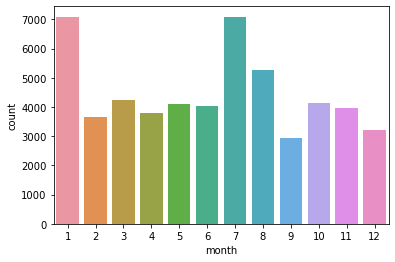

In [75]:
sns.countplot(propfinal_2['month'])

In [76]:
for month in sorted(propfinal_2['month'].unique()):
    mean = round(propfinal_2[propfinal_2['month'] == month]['days'].mean(), 2)    
    print("Para el mes {} el promedio de tiempo de venta es de {}".format(month, mean))

Para el mes 1 el promedio de tiempo de venta es de 53.46
Para el mes 2 el promedio de tiempo de venta es de 79.47
Para el mes 3 el promedio de tiempo de venta es de 75.25
Para el mes 4 el promedio de tiempo de venta es de 60.59
Para el mes 5 el promedio de tiempo de venta es de 42.11
Para el mes 6 el promedio de tiempo de venta es de 34.54
Para el mes 7 el promedio de tiempo de venta es de 49.19
Para el mes 8 el promedio de tiempo de venta es de 19.45
Para el mes 9 el promedio de tiempo de venta es de 25.25
Para el mes 10 el promedio de tiempo de venta es de 40.77
Para el mes 11 el promedio de tiempo de venta es de 34.67
Para el mes 12 el promedio de tiempo de venta es de 17.86


Efectivamente existe una relación entre el mes que se inicia la publicación y el tiempo que demora en venderse. Se observa que Enero y Julio, poseen picos de publicaciones, mientras que Junio, Julio, Agosto, Noviembre y Diciembre poseen los promedios más bajos en tiempo de venta. Es posible que estos números se daban a que los meses son justos o cercanos a los pagos de los sueldos complementarios (aguinaldos). Puede que esta sea una variable de interés tan importante como el valor de los metros2 en los proyectos anteriores.

## Preparación del Dataset

Con los excelentes resultados que mostraron los modelos re-escalando las variables y trabajando con los encoders, opto por volver a seguir estos dos pasos en la preparación de mi dataset definitivo, previo a correr el modelo. 

### Re-Escalado de datos

Primero me quedo solo con las columnas que quiero trabajar. 

In [77]:
propfinal_2.head(2)

,property_type,Barrio,index,start_date,end_date,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price,days,pricem2,month
0,Departamento,San Cristobal,0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0,67,1092.857143,10
1,PH,Boedo,1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0,35,2741.379310,10


In [78]:
propfinal_2 = propfinal_2.drop(columns=['index','start_date','end_date','País','Localidad'], axis=1)

In [79]:
propfinal_2.head(2)

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10


Index ya no es útil para el análisis.

Star y End date ya fueron utilizados para los calculos de días y meses por lo que no serán variables útiles de aquí en adelante. 

País y Localidad son datos innecesarios por que ya se determinó que la base de datos es integra para Argentina y Capital Federal.

In [80]:
#Re-escalo SUPERFICIE
VM_Surface = propfinal_2.surface_covered.mean()
std_Surface = propfinal_2.surface_covered.std()
propfinal_2['re_surface'] = (propfinal_2.surface_covered - VM_Surface)/std_Surface
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month,re_surface
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10,2.311840
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10,-0.529204
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,10,-0.979614
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,10,-0.806379
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,10,-0.598498


In [81]:
#Re-escalo HABITACIONES
VM_rooms = propfinal_2.rooms.mean()
std_rooms = propfinal_2.rooms.std()
propfinal_2['re_rooms'] = (propfinal_2.rooms - VM_rooms)/std_rooms
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month,re_surface,re_rooms
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10,2.311840,4.064348
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10,-0.529204,-1.044727
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,10,-0.979614,-1.044727
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,10,-0.806379,-1.044727
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,10,-0.598498,-1.044727


In [82]:
VM_bathrooms = propfinal_2.bathrooms.mean()
std_bathrooms = propfinal_2.bathrooms.std()
propfinal_2['re_bathrooms'] = (propfinal_2.bathrooms - VM_bathrooms)/std_bathrooms
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month,re_surface,re_rooms,re_bathrooms
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10,2.311840,4.064348,0.762437
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10,-0.529204,-1.044727,0.762437
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,10,-0.979614,-1.044727,-0.737369
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,10,-0.806379,-1.044727,-0.737369
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,10,-0.598498,-1.044727,-0.737369


Opto por tomar el mismo camino que en los proyectos anteriores: reescalo también habitaciones y baños ya que superficie cubierta reescalada contempla valores negativos y no quiero que los modelos de ML interpreten que un valor negativo de superficie cubierta sea más chico que un baño o una habitación. Por lo tanto reescalo los valores. 

Re-escalo Latitud Y Longitud

In [83]:
VM_lat = propfinal_2.lat.mean()
std_lat = propfinal_2.lat.std()
propfinal_2['re_lat'] = (propfinal_2.lat - VM_lat)/std_lat
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month,re_surface,re_rooms,re_bathrooms,re_lat
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10,2.311840,4.064348,0.762437,-0.470919
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10,-0.529204,-1.044727,0.762437,-1.285263
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,10,-0.979614,-1.044727,-0.737369,0.080650
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,10,-0.806379,-1.044727,-0.737369,0.630611
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,10,-0.598498,-1.044727,-0.737369,0.071239


In [84]:
VM_lon = propfinal_2.lon.mean()
std_lon = propfinal_2.lon.std()
propfinal_2['re_lon'] = (propfinal_2.lon - VM_lon)/std_lon
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month,re_surface,re_rooms,re_bathrooms,re_lat,re_lon
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10,2.311840,4.064348,0.762437,-0.470919,1.529579
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10,-0.529204,-1.044727,0.762437,-1.285263,0.719833
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,10,-0.979614,-1.044727,-0.737369,0.080650,0.261796
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,10,-0.806379,-1.044727,-0.737369,0.630611,-0.014869
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,10,-0.598498,-1.044727,-0.737369,0.071239,-0.148572


Re-escalo Precio, Precio x mtr2, Days y Month

In [85]:
VM_price = propfinal_2.price.mean()
std_price = propfinal_2.price.std()
propfinal_2['re_price'] = (propfinal_2.price - VM_price)/std_price
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month,re_surface,re_rooms,re_bathrooms,re_lat,re_lon,re_price
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10,2.311840,4.064348,0.762437,-0.470919,1.529579,-0.772839
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10,-0.529204,-1.044727,0.762437,-1.285263,0.719833,-0.704647
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,10,-0.979614,-1.044727,-0.737369,0.080650,0.261796,-1.091073
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,10,-0.806379,-1.044727,-0.737369,0.630611,-0.014869,0.841059
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,10,-0.598498,-1.044727,-0.737369,0.071239,-0.148572,-0.806936


In [86]:
VM_pricem2 = propfinal_2.pricem2.mean()
std_pricem2 = propfinal_2.pricem2.std()
propfinal_2['re_pricem2'] = (propfinal_2.pricem2 - VM_pricem2)/std_pricem2
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month,re_surface,re_rooms,re_bathrooms,re_lat,re_lon,re_price,re_pricem2
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10,2.311840,4.064348,0.762437,-0.470919,1.529579,-0.772839,-2.163414
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10,-0.529204,-1.044727,0.762437,-1.285263,0.719833,-0.704647,-0.432862
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,10,-0.979614,-1.044727,-0.737369,0.080650,0.261796,-1.091073,-0.394652
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,10,-0.806379,-1.044727,-0.737369,0.630611,-0.014869,0.841059,2.882931
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,10,-0.598498,-1.044727,-0.737369,0.071239,-0.148572,-0.806936,-0.498795


In [87]:
VM_days = propfinal_2.days.mean()
std_days = propfinal_2.days.std()
propfinal_2['re_days'] = (propfinal_2.days - VM_days)/std_days
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month,re_surface,re_rooms,re_bathrooms,re_lat,re_lon,re_price,re_pricem2,re_days
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10,2.311840,4.064348,0.762437,-0.470919,1.529579,-0.772839,-2.163414,0.408808
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10,-0.529204,-1.044727,0.762437,-1.285263,0.719833,-0.704647,-0.432862,-0.191088
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,10,-0.979614,-1.044727,-0.737369,0.080650,0.261796,-1.091073,-0.394652,-0.566024
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,10,-0.806379,-1.044727,-0.737369,0.630611,-0.014869,0.841059,2.882931,0.408808
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,10,-0.598498,-1.044727,-0.737369,0.071239,-0.148572,-0.806936,-0.498795,-0.566024


In [88]:
VM_month = propfinal_2.month.mean()
std_month = propfinal_2.month.std()
propfinal_2['re_month'] = (propfinal_2.month - VM_month)/std_month
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,month,re_surface,re_rooms,re_bathrooms,re_lat,re_lon,re_price,re_pricem2,re_days,re_month
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,10,2.311840,4.064348,0.762437,-0.470919,1.529579,-0.772839,-2.163414,0.408808,1.125779
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,10,-0.529204,-1.044727,0.762437,-1.285263,0.719833,-0.704647,-0.432862,-0.191088,1.125779
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,10,-0.979614,-1.044727,-0.737369,0.080650,0.261796,-1.091073,-0.394652,-0.566024,1.125779
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,10,-0.806379,-1.044727,-0.737369,0.630611,-0.014869,0.841059,2.882931,0.408808,1.125779
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,10,-0.598498,-1.044727,-0.737369,0.071239,-0.148572,-0.806936,-0.498795,-0.566024,1.125779


### Encoders

En principio asumo la codificación para los tipos de propiedades

In [89]:
property_type_dummies = pd.get_dummies(propfinal_2.property_type, prefix='property_type')

In [90]:
propfinal_2 = pd.concat([propfinal_2, property_type_dummies], axis=1)

In [91]:
propfinal_2.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,days,pricem2,...,re_pricem2,re_days,re_month,property_type_Casa,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,67,1092.857143,...,-2.163414,0.408808,1.125779,0,1,0,0,0,0,0
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,35,2741.379310,...,-0.432862,-0.191088,1.125779,0,0,0,0,0,0,1
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,15,2777.777778,...,-0.394652,-0.566024,1.125779,0,0,0,0,0,0,1
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,67,5900.000000,...,2.882931,0.408808,1.125779,0,0,0,0,0,0,1
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,15,2678.571429,...,-0.498795,-0.566024,1.125779,0,0,0,0,0,0,1


En principio no iba a codificar los barrios, pero luego de evaluarlo bastante, decido hacerlo, asumiendo que la cantidad de columnas tomará grandes dimensiones, pero es de mi especial interés ver si para el modelo, el barrio tiene alguna incidencia en la cantidad de días que está publicada la propiedad. 

In [92]:
#Pasos a seguir. Codificar los barrios. 
#Hacer el traint y test split
#Correr el modelo y ver si sobre ajusta
#Ajustar por gread serch
#Cerrar conclusiones

In [93]:
#Codifico el barrio para que también ser interpretado por el modelo.
barrios_dummies = pd.get_dummies(propfinal_2.Barrio, prefix='Barrio')

In [94]:
propfinal_2 = pd.concat([propfinal_2, barrios_dummies], axis=1)

In [95]:
propfinal_2.shape

(53427, 84)

Al igual que en los proyectos anteriores, el dataset se agranda en columnas tal cual lo esperado. A partir de ahora, con el dataset listo, preparamos el modelo.

# Modelo avanzado - RandomForest

Elijo trabajar con un modelo avanzado de RandomForest que tuvo un buen desempeño en el proyecto anterior y además porque su costo computacional fue menor. 

In [96]:
#Importo nuevas librerías 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
#import warnings
#warnings.filterwarnings('once')

In [97]:
#Establezco las columnas con las que voy a trabajar
propfinal_2.columns

Index(['property_type', 'Barrio', 'lat', 'lon', 'rooms', 'bathrooms',
       'surface_covered', 'price', 'days', 'pricem2', 'month', 're_surface',
       're_rooms', 're_bathrooms', 're_lat', 're_lon', 're_price',
       're_pricem2', 're_days', 're_month', 'property_type_Casa',
       'property_type_Departamento', 'property_type_Local comercial',
       'property_type_Lote', 'property_type_Oficina', 'property_type_Otro',
       'property_type_PH', 'Barrio_Abasto', 'Barrio_Agronomía',
       'Barrio_Almagro', 'Barrio_Balvanera', 'Barrio_Barracas',
       'Barrio_Barrio Norte', 'Barrio_Belgrano', 'Barrio_Boca', 'Barrio_Boedo',
       'Barrio_Caballito', 'Barrio_Catalinas', 'Barrio_Centro / Microcentro',
       'Barrio_Chacarita', 'Barrio_Coghlan', 'Barrio_Colegiales',
       'Barrio_Congreso', 'Barrio_Constitución', 'Barrio_Flores',
       'Barrio_Floresta', 'Barrio_Las Cañitas', 'Barrio_Liniers',
       'Barrio_Mataderos', 'Barrio_Monserrat', 'Barrio_Monte Castro',
       'Barrio_Nuñez

In [98]:
X= propfinal_2[['re_surface',
       're_rooms', 're_bathrooms', 're_lat', 're_lon', 're_price',
       're_pricem2', 're_month', 'property_type_Casa',
       'property_type_Departamento', 'property_type_Local comercial',
       'property_type_Lote', 'property_type_Oficina', 'property_type_Otro',
       'property_type_PH', 'Barrio_Abasto', 'Barrio_Agronomía',
       'Barrio_Almagro', 'Barrio_Balvanera', 'Barrio_Barracas',
       'Barrio_Barrio Norte', 'Barrio_Belgrano', 'Barrio_Boca', 'Barrio_Boedo',
       'Barrio_Caballito', 'Barrio_Catalinas', 'Barrio_Centro / Microcentro',
       'Barrio_Chacarita', 'Barrio_Coghlan', 'Barrio_Colegiales',
       'Barrio_Congreso', 'Barrio_Constitución', 'Barrio_Flores',
       'Barrio_Floresta', 'Barrio_Las Cañitas', 'Barrio_Liniers',
       'Barrio_Mataderos', 'Barrio_Monserrat', 'Barrio_Monte Castro',
       'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']]
y = propfinal_2.days

In [99]:
#Diseño el modelo de train y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [100]:
#Defino el modelo de Random Forest
forest_model = RandomForestRegressor(n_estimators = 10, 
                                  random_state = 2016,
                                  min_samples_leaf = 8,)

In [101]:
#Entreno el modelo
forest_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=8, n_estimators=10, random_state=2016)

In [102]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = forest_model.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = forest_model.predict(X_test)

In [116]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 36.958822826743216
Raíz del error cuadrático medio en Test: 45.27394792887834


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


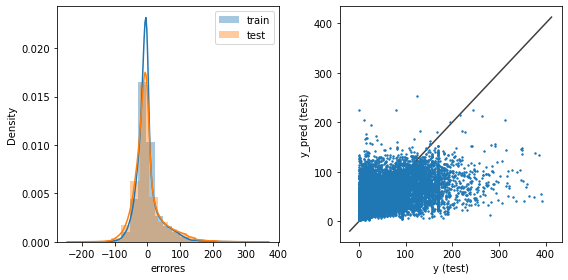

In [107]:
#Obtengo MUY buenos resultados, pero deseo graficarlo para entenderlo mejor. 
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

Como primer corrida del modelo creo que tiene un buen desempeño pero la diferencia entre train y test me indica que el modelo podría estar sobre ajustando, por lo que voy a analizar un poco más en detalle y buscar reducir el error. 

## Optimización de Hiperparametros mediante Grid Search 


Utilizo Gread Search para realizar una busqueda optima de los mejores hiperparametros y no realizar una búsqueda individual los mismos

In [117]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [50, 150, 300],
              'max_features': [5, 7, 9],
              'max_depth'   : [3, 5, 10]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
26,10,9,300,-48.588979,0.462174,-46.920822,0.120436
25,10,9,150,-48.602219,0.459199,-46.924164,0.116034
24,10,9,50,-48.728781,0.479757,-47.109863,0.112909
23,10,7,300,-49.027875,0.461566,-47.549877,0.111454


In [115]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 10, 'max_features': 9, 'n_estimators': 300} : -48.588979374630654 neg_root_mean_squared_error


In [118]:
# Error de test del modelo final
# ==============================================================================
modelo_final_rf = grid.best_estimator_
predicciones = forest_model.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 47.15155617330656
Raíz del error cuadrático medio en Test: 47.90519261031288


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


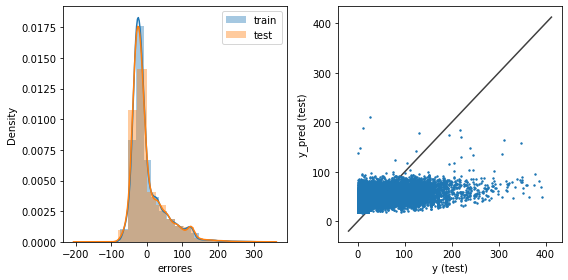

In [117]:
modelos = ['Random Forest']

for i, model in enumerate([modelo_final_rf]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Importancia de los predictores y permutaciones

In [119]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final_rf.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
7,re_month,0.364413
4,re_lon,0.139027
3,re_lat,0.124427
6,re_pricem2,0.053399
5,re_price,0.049542
...,...,...
30,Barrio_Congreso,0.000150
11,property_type_Lote,0.000110
10,property_type_Local comercial,0.000080
69,Barrio_Villa Soldati,0.000032


In [120]:
importancia = permutation_importance(
                estimator    = modelo_final_rf,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
7,4.637711,0.060489,re_month
4,1.823327,0.005621,re_lon
3,1.560234,0.019829,re_lat
6,0.710886,0.006681,re_pricem2
5,0.638048,0.011454,re_price
...,...,...,...
30,0.001445,0.000423,Barrio_Congreso
11,0.000501,0.000087,property_type_Lote
10,0.000458,0.000043,property_type_Local comercial
69,0.000083,0.000003,Barrio_Villa Soldati


<AxesSubplot:>

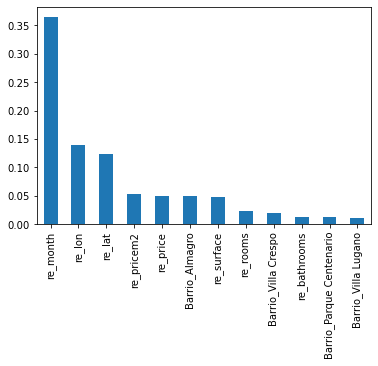

In [121]:
feat_importances = pd.Series(modelo_final_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='bar')

### Conclusión pre-liminar:

El modelo ha perfomado bastante bien luego de ajustar los hiperparámetros y ha resultado por debajo de los 50 días de error, lo cual me parece bastante aceptable. Sin embargo, luego de analizar los predictores, observo que la clasificación de los barrios no han resultado con gran incidencia sobre el modelo por lo que no me encuentro tan satisfecho con el resultado. Por consiguiente, optaré por realizar un modelo más de XGBoost, al igual que lo realicé en el proyecto 02, el cual había performado mejor que el RandomForest, pero esta vez buscaré realizar el modelo sin agregar la información de los barrios buscando ver si puedo bajar la cantidad de días de error de su modelo antecesor. 


## Modelo Avanzado N° 2 - XGBOOST

In [104]:
#Importamos el modelo 

#Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing


In [105]:
#Nuevamente definimos el train-test-split
X2= propfinal_2[['re_surface',
       're_rooms', 're_bathrooms', 're_lat', 're_lon', 're_price',
       're_pricem2', 're_month', 'property_type_Casa',
       'property_type_Departamento', 'property_type_Local comercial',
       'property_type_Lote', 'property_type_Oficina', 'property_type_Otro',
       'property_type_PH']]
y2 = propfinal_2.days

In [106]:
#Vuelvo a diseñar el modelo de train y test para los modelos avanzados
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [107]:
#Creación del modelo 
import xgboost as xgb
from xgboost import XGBRegressor

In [108]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'booster'          : ['gbtree']
             }


# Crear conjunto de validación
# ==============================================================================
np.random.seed(123)
idx_validacion = np.random.choice(
                    X2_train.shape[0],
                    size= int(X2_train.shape[0]*0.1),
                    replace=False
                 )

X2_val = X2_train.iloc[idx_validacion, :].copy()
y2_val = y2_train.iloc[idx_validacion].copy()

X2_train_grid = X2_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()
y2_train_grid = y2_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()

# XGBoost necesita pasar los paramétros específicos del entrenamiento al llamar
# al método .fit()
fit_params = {"early_stopping_rounds" : 5, 
              "eval_metric"           : "rmse", 
              "eval_set"              : [(X2_val, y2_val)],
              "verbose"               : 0
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = XGBRegressor(
                        n_estimators = 1000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X2_train_grid, y = y2_train_grid, **fit_params)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-51.47756256 -51.48630288 -54.06572347 -54.08119211 -52.67277357
 -52.70464729 -51.76239307 -51.76532597 -50.68064158 -50.83508835
 -50.77921052          nan -46.75197095 -46.83040976 -49.3883424
 -49.50990863 -48.04347567 -47.88517551 -47.14056073 -47.19830333
 -45.38753359 -45.99997263 -44.89784764 -47.97104207 -47.01635285
 -46.52588527 -48.94700643 -48.79594525 -47.90131911 -47.69344107
 -47.28514654 -46.9720665  -46.10558616 -45.99559479 -46.0363994
 -47.9561177 ]
  warnings.warn(
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [-50.69015556 -50.67962171 -54.06469361 -54.08105203 -52.60124597
 -52.64063782 -51.33887862 -51.33791468 -46.85179845 -46.18830328
 -40.79695041          nan -43.34138367 -43.11538403 

,param_booster,param_learning_rate,param_max_depth,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
22,gbtree,0.01,20,0.5,-44.897848,0.321303,-15.714826,0.591573
20,gbtree,0.01,10,0.5,-45.387534,0.546974,-33.423565,1.161445
33,gbtree,0.1,10,1,-45.995595,0.183463,-30.177081,2.032707
21,gbtree,0.01,10,1,-45.999973,0.306914,-31.860657,1.725414


In [109]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Número de árboles del modelo final (early stopping)
# ==============================================================================
n_arboles_incluidos = len(grid.best_estimator_.get_booster().get_dump())
print(f"Número de árboles incluidos en el modelo: {n_arboles_incluidos}")

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 20, 'subsample': 0.5} : -44.89784763680854 neg_root_mean_squared_error
Número de árboles incluidos en el modelo: 507


In [112]:
# Error de test del modelo final
# ==============================================================================
modelo_final_xgb = grid.best_estimator_
predicciones = modelo_final_xgb.predict(X2_test)
rmse = mean_squared_error(
        y_true  = y2_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 43.467392209608896


In [113]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X2_train.columns,
                             'importancia': modelo_final_xgb.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
7,re_month,0.111820
8,property_type_Casa,0.111492
13,property_type_Otro,0.105879
4,re_lon,0.080761
6,re_pricem2,0.074757
14,property_type_PH,0.072971
3,re_lat,0.064904
5,re_price,0.063611
12,property_type_Oficina,0.062127
9,property_type_Departamento,0.055059


Month ha sido el predictor más importante nuevamente en conjunto con los tipos de propiedades "casa" y "otro". 

In [114]:
importancia = permutation_importance(
                estimator    = modelo_final_xgb,
                X            = X2_train,
                y            = y2_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X2_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
7,30.771612,0.124057,re_month
4,25.076630,0.067149,re_lon
3,22.675820,0.126848,re_lat
0,13.273620,0.046408,re_surface
6,12.915338,0.061973,re_pricem2
5,11.274435,0.070663,re_price
1,3.215068,0.022612,re_rooms
2,2.522327,0.019544,re_bathrooms
9,0.575052,0.011887,property_type_Departamento
8,0.300967,0.017859,property_type_Casa


Los permutadores de mayor relevancia han sido Month (Mes) y Lat y Lon (ubicación). 

Modelo: X G BOOST
Raíz del error cuadrático medio en Train: 20.265425086465633
Raíz del error cuadrático medio en Test: 43.467392209608896


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


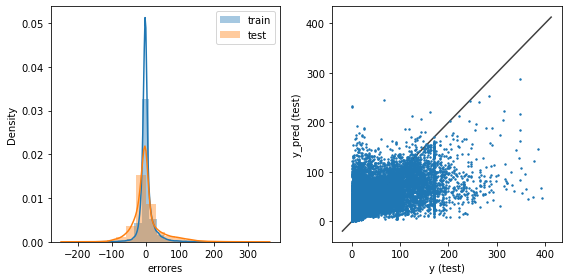

In [120]:
#Grafico el último modelo 
modelos = ['X G BOOST']

for i, model in enumerate([modelo_final_xgb]):
    y2_train_pred = model.predict(X2_train)
    y2_test_pred = model.predict(X2_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y2_train - y2_train_pred, bins = 20, label = 'train')
    sns.distplot(y2_test - y2_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y2_test,y2_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Conclusiones Finales

Desde este punto me encuentro en condiciones de decir que, a diferencia del modelo anterior que realicé para el proyecto 02, para este caso y para esta nueva pregunta problema, el modelo que mejor ha performado luego de de RandomForest. 

Algunos aspectos importantes a remarcar sobre los modelos y resultados:

    1- Logró un tiempo de ejecución muy superior sobre el X G Boost, ya que el primer modelo corrió en menos de 20 minutos mientras que el segundo tardó más de hora y media
    2- Si bien el segundo modelo posee un mejor valor de RMSE en TEST, aun tiene 20 días de diferencias contra el modelo en train, lo cual indica que aun sobre ajusta. Si le tenemos que sumar la demanda computacional que lleva, sin dudas le diría al cliente que opte por el primer modelo.
    3- Ambos modelos performaron por debajo de los 50 días de error, lo cual me parece bastante aceptable, aunque sin dudas puede seguir mejorando. 
    4- Para ambos modelos, las variables más importantes para determinar la cantidad de días en que tardaría en venderse una propiedad, han sido el MES y la ubicación (Latitud y Longitud, con diferencias muy estrechas), esto quiere decir que mi hipotesis ha sido correcta al quitar los barrios en el segundo modelo, ya que la información de LAT y LON perfomaba mejor. 
    5- Una acotación especial para la variable MES: Siendo que siempre fue la variable más importante, es posible inferir que el negocio es estacional y que influye mucho más en la cantidad de días de publicación cuando se empieza a vender la propiedad, que cuando se está vendiendo. 
    6- Como constancia final recomendaría al cliente que profundicemos sobre el primer modelo RandomForest y que trabajemos sobre campañas en los meses claves respecto de la ubicación de cada propiedad. 

## Consideraciones del trabajo final

Por último me parece interesante decir que no hubiera podido realizar este trabajo final si no hubiese respetado los pasos que hemos visto a lo largo del curso. Todo esto basado en que, ante un nueva pregunta problema, todo el análisis pasa a ser diferente. Sin dudas ha sido una experiencia gratificante. 

### Repositorio de GitHub:

https://github.com/Gaston0299/Proyecto-Data-Sciences-Acamica.git